In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gensim
from gensim.models import word2vec  
from sklearn.manifold import TSNE  
import re  
import nltk  
from nltk.corpus import stopwords  
from nltk.stem.porter import *  
stemmer = PorterStemmer()  
from collections import Counter
from nltk.stem import PorterStemmer


In [18]:
data = pd.read_csv('crash.csv',delimiter = ',')
df = pd.DataFrame(data)
df.head()
df.shape[0]
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [19]:
df = df.dropna(subset = "Summary")
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [20]:
def rewiew_to(raw):
    letters_only = re.sub("[^a-zA-Z]", " ",raw)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    m_words = [w for w in words if not w in stops]
    lemma = nltk.wordnet.WordNetLemmatizer()
    singles = [lemma.lemmatize(word) for word in m_words]
    return (" ".join(singles))

In [27]:
proc = [rewiew_to(text) for text in df["Summary"]]

In [32]:
def str_to_lst(text):
    res = []
    for elem in text:
        res.append([w for w in elem.split()])
    return res

In [33]:
res = str_to_lst(proc)

In [24]:
model = word2vec.Word2Vec(res, window=5, min_count=40, workers=4)  
len(model.wv)

377

In [43]:
def show_model(model):
    labeles = []
    tokens = []
    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labeles.append(word)
    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=40, n_components=2,init='pca', max_iter=2500)
    new_values = tsne_model.fit_transform(tokens)
    tok_val = {}
    for l,t in zip(labeles,new_values):
        tok_val[l] = t
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(8,8))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labeles[i],xy = (x[i],y[i]),xytext = (5,2),
        textcoords= 'offset points',ha = 'right',va = 'bottom')
    plt.show()
    return (new_values,tok_val)    

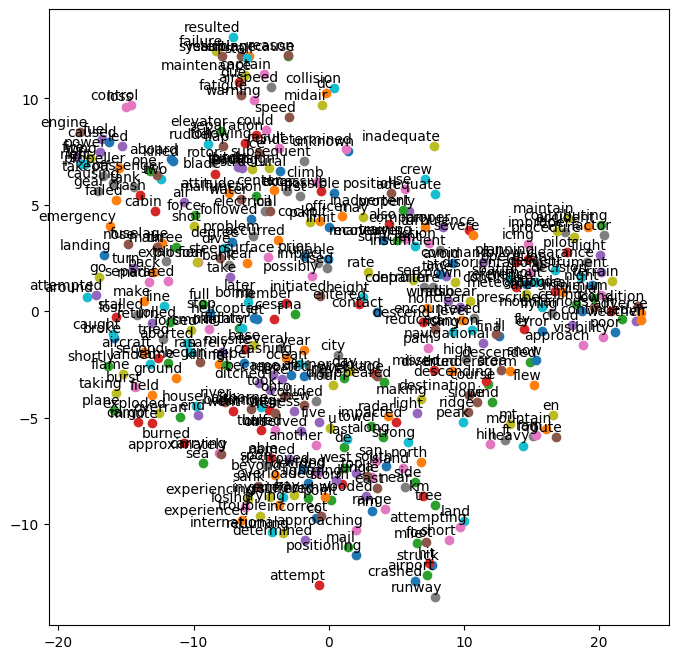

In [44]:
show = show_model(model)
n_val = show[0]
accordance = show[1]

In [42]:
accordance["crashed"]

array([ -3.5669806, -13.646082 ], dtype=float32)

In [46]:
ac = pd.DataFrame.from_dict(accordance,orient="index")
ac



,0,1
crashed,6.403624,-12.667038
aircraft,-13.657884,-1.909550
plane,-15.920609,-4.630187
pilot,17.609816,2.761023
flight,20.053427,2.661961
...,...,...
fell,-7.599788,-2.539929
f,-4.014319,-0.375552
lightning,0.566153,-7.931694
sank,-5.215605,-8.207676


In [57]:
vectors = []
for elem in proc:
    res = np.array([0.,0.])
    for word in elem.split(" "):
        if word in list(accordance.keys()):
            res += accordance[word]
    vectors.append(res)

In [61]:
len(df["Summary"])

4878

In [59]:
len(vectors)

4878

In [74]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import *
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import pyspark.sql.functions as sf
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

In [75]:
from pyspark import SparkContext, SparkConf, HiveContext
from pyspark.sql.functions import col, asc, desc

conf = SparkConf().setAppName('spark_dlab_app') 

# запуск сессии спарка
spark = SparkSession.builder.config(conf = conf).enableHiveSupport().getOrCreate()
spark

In [70]:
sent_vect = pd.DataFrame(vectors)
sent_vect.to_csv("sent_vectors.csv",header = False,index = False)

In [77]:
sent_vect_sp = spark.read.csv("sent_vectors.csv", sep = ",", inferSchema = True)

In [78]:
from pyspark.ml.feature import VectorAssembler 
from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

vec_assembler = VectorAssembler(inputCols = sent_vect_sp.columns, 
                                outputCol='features') 
  
final_data = vec_assembler.transform(sent_vect_sp) 
final_data.select('features').show(5)


+--------------------+
|            features|
+--------------------+
|[-125.60146532952...|
|[35.2103325277566...|
|[-4.0692234039306...|
|[8.24770402908325...|
|[-21.259034156799...|
+--------------------+
only showing top 5 rows



In [79]:
from pyspark.ml.feature import StandardScaler 
  
scaler = StandardScaler(inputCol="features",  
                        outputCol="scaledFeatures",  
                        withStd=True,  
                        withMean=False) 
  
# Compute summary statistics by fitting the StandardScaler 
scalerModel = scaler.fit(final_data) 
  
# Normalize each feature to have unit standard deviation. 
final_data = scalerModel.transform(final_data) 
pf_final = final_data.toPandas()

final_data.show()
final_data.select('scaledFeatures').show(5)

+-------------------+-------------------+--------------------+--------------------+
|                _c0|                _c1|            features|      scaledFeatures|
+-------------------+-------------------+--------------------+--------------------+
|-125.60146532952785|  30.66494572162628|[-125.60146532952...|[-1.2362766935729...|
|  35.21033252775669| -7.356502830982208|[35.2103325277566...|[0.34657010857966...|
| -4.069223403930664|  31.74652862548828|[-4.0692234039306...|[-0.0400527656426...|
|  8.247704029083252|-31.271368354558945|[8.24770402908325...|[0.08118093399541...|
|-21.259034156799316|  8.402670860290527|[-21.259034156799...|[-0.2092495369139...|
| 10.411723136901855|-39.662482500076294|[10.4117231369018...|[0.10248105482142...|
| -11.57153332233429| -34.56439256668091|[-11.571533322334...|[-0.1138968953727...|
| 1.0780582427978516| -8.523231506347656|[1.07805824279785...|[0.01061116824066...|
| -42.01956748962402|-3.0803120136260986|[-42.019567489624...|[-0.4135924037

In [80]:
#Importing the model 
from pyspark.ml.clustering import KMeans 
from pyspark.ml.evaluation import ClusteringEvaluator 
  
silhouette_score=[] 
  
evaluator = ClusteringEvaluator(predictionCol='prediction', 
                                featuresCol='scaledFeatures',  
                                metricName='silhouette',  
                                distanceMeasure='squaredEuclidean') 
  
for i in range(2,10): 
    kmeans=KMeans(featuresCol='scaledFeatures', k=i) 
    model=kmeans.fit(final_data) 
    predictions=model.transform(final_data) 
    score=evaluator.evaluate(predictions) 
    silhouette_score.append(score) 
    print('Silhouette Score for k =',i,'is',score)

Silhouette Score for k = 2 is 0.5580205348303161
Silhouette Score for k = 3 is 0.5780377619635592
Silhouette Score for k = 4 is 0.5020170497121392
Silhouette Score for k = 5 is 0.4134910800356792
Silhouette Score for k = 6 is 0.4035010375077182
Silhouette Score for k = 7 is 0.4246913174718153
Silhouette Score for k = 8 is 0.4249011807956869
Silhouette Score for k = 9 is 0.45984668959848224


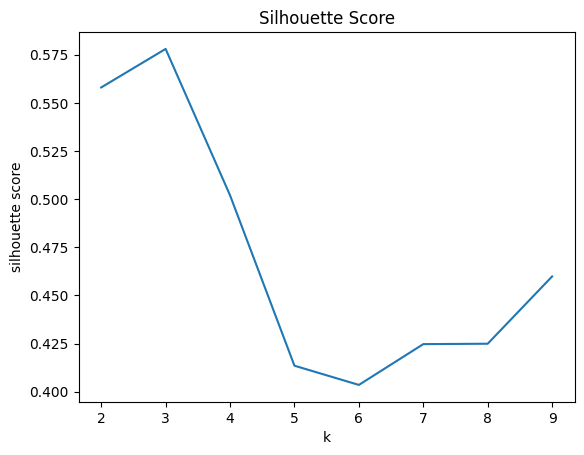

In [82]:
import matplotlib.pyplot as plt 
  
plt.plot(range(2,10),silhouette_score) 
plt.xlabel('k') 
plt.ylabel('silhouette score') 
plt.title('Silhouette Score') 
plt.show()

In [84]:
kmeans = KMeans(featuresCol='scaledFeatures',k=6) 
model = kmeans.fit(final_data)
predictions = model.transform(final_data)
predictions.show()
c = predictions.select("_c0").toPandas()
c = list(c["_c0"])

+-------------------+-------------------+--------------------+--------------------+----------+
|                _c0|                _c1|            features|      scaledFeatures|prediction|
+-------------------+-------------------+--------------------+--------------------+----------+
|-125.60146532952785|  30.66494572162628|[-125.60146532952...|[-1.2362766935729...|         2|
|  35.21033252775669| -7.356502830982208|[35.2103325277566...|[0.34657010857966...|         5|
| -4.069223403930664|  31.74652862548828|[-4.0692234039306...|[-0.0400527656426...|         5|
|  8.247704029083252|-31.271368354558945|[8.24770402908325...|[0.08118093399541...|         1|
|-21.259034156799316|  8.402670860290527|[-21.259034156799...|[-0.2092495369139...|         5|
| 10.411723136901855|-39.662482500076294|[10.4117231369018...|[0.10248105482142...|         0|
| -11.57153332233429| -34.56439256668091|[-11.571533322334...|[-0.1138968953727...|         1|
| 1.0780582427978516| -8.523231506347656|[1.078058

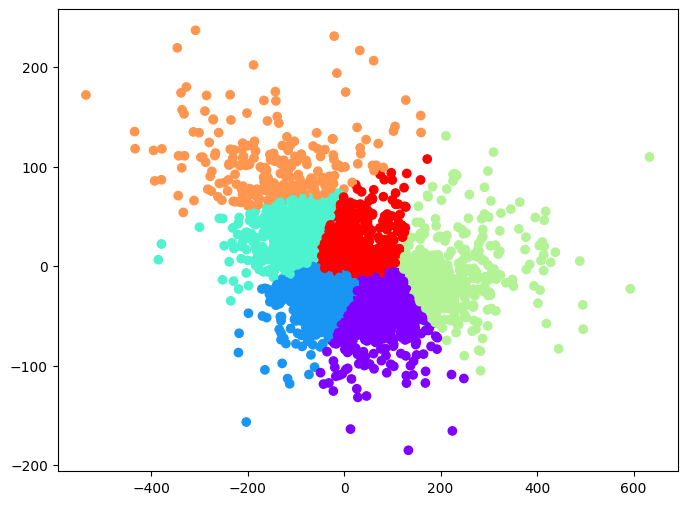

In [85]:
x = final_data.select("_c0").toPandas()
y = final_data.select("_c1").toPandas()
x1 = list(x["_c0"])
y1 = list(y["_c1"])
pred = predictions.select("prediction").toPandas()
pred = list(pred["prediction"])
#words = list(accordance.keys())
fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111)
#for i,word in zip(range(130,len(x1)-150),words):
 #   ax.annotate(word,(x1[i],y1[i]),xytext = (x1[i]+0.3,y1[i]+0.3))

plt.scatter(x1, y1, c = pred, cmap="rainbow")
plt.show()

In [86]:
ac["Predictions"] = pred
ac

ValueError: Length of values (4878) does not match length of index (377)

In [38]:
centers = model.clusterCenters() 
print("Cluster Centers: ") 
for center in centers: 
    print(center)
centers[0]

Cluster Centers: 
[-1.14021776 -0.53627855]
[-0.09326382  1.59800841]
[1.39005033 0.41845517]
[-1.32878172  0.83534922]
[ 0.87140145 -0.9953959 ]
[-0.13819742 -1.09426297]
[-0.09259818  0.44659535]


array([-1.14021776, -0.53627855])

In [39]:
clas = list(zip(words,pred))

sorted(clas,key = lambda clas:clas[1])

[('aircraft', 0),
 ('ground', 0),
 ('cargo', 0),
 ('shortly', 0),
 ('lost', 0),
 ('minute', 0),
 ('helicopter', 0),
 ('turn', 0),
 ('flame', 0),
 ('broke', 0),
 ('made', 0),
 ('stalled', 0),
 ('go', 0),
 ('around', 0),
 ('burned', 0),
 ('attempted', 0),
 ('shot', 0),
 ('field', 0),
 ('took', 0),
 ('reported', 0),
 ('make', 0),
 ('second', 0),
 ('landed', 0),
 ('went', 0),
 ('return', 0),
 ('exploded', 0),
 ('burst', 0),
 ('tried', 0),
 ('line', 0),
 ('end', 0),
 ('steep', 0),
 ('force', 0),
 ('river', 0),
 ('back', 0),
 ('military', 0),
 ('forced', 0),
 ('house', 0),
 ('overran', 0),
 ('ran', 0),
 ('began', 0),
 ('fighter', 0),
 ('bank', 0),
 ('came', 0),
 ('base', 0),
 ('jet', 0),
 ('building', 0),
 ('killing', 0),
 ('aborted', 0),
 ('rolled', 0),
 ('separated', 0),
 ('rebel', 0),
 ('missile', 0),
 ('failure', 1),
 ('crew', 1),
 ('due', 1),
 ('captain', 1),
 ('cause', 1),
 ('resulted', 1),
 ('airplane', 1),
 ('speed', 1),
 ('system', 1),
 ('reason', 1),
 ('resulting', 1),
 ('climb', 1